## Arboles de Decisiones

### David Mercado 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

In [9]:
data = pd.read_csv('winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.shape

(1599, 12)

In [13]:
#se pide una descripción estádistica de cada columna

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
#se busca si hay valores faltantes en el data set en cada columna, y se observa que no

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


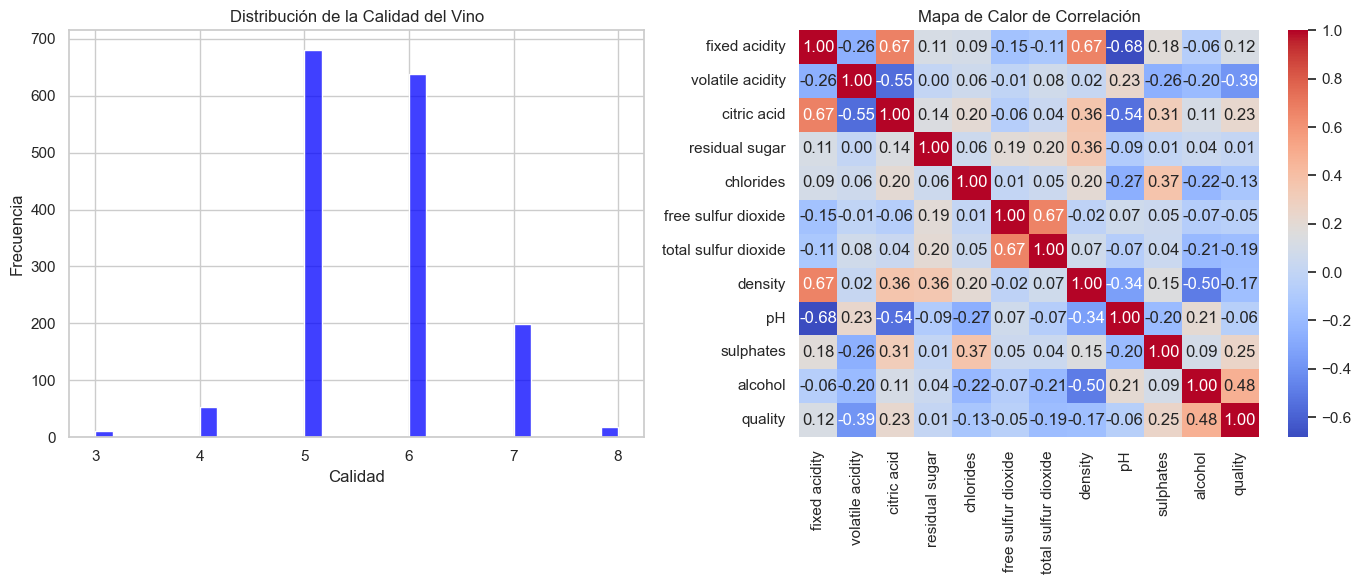

In [19]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.histplot(data['quality'], kde=False, ax=axes[0], color='blue')
axes[0].set_title('Distribución de la Calidad del Vino')
axes[0].set_xlabel('Calidad')
axes[0].set_ylabel('Frecuencia')

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Mapa de Calor de Correlación')


plt.tight_layout()
plt.show()

In [21]:
X = data.drop('quality', axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [23]:
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=10)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.55

In [25]:
feature_importances = tree_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature':  X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
10,alcohol,0.514112
9,sulphates,0.197882
6,total sulfur dioxide,0.150901
1,volatile acidity,0.085119
7,density,0.029213
5,free sulfur dioxide,0.022773
0,fixed acidity,0.000000
2,citric acid,0.000000
3,residual sugar,0.000000
4,chlorides,0.000000


In [35]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [18, 20, 22, 24],
    'min_samples_leaf': [8, 10, 12, 14],
    'criterion': ['gini', 'entropy']
}

dt= DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [37]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'criterion': 'gini',
  'max_depth': 4,
  'min_samples_leaf': 10,
  'min_samples_split': 18},
 0.6068345611787316)

In [39]:
y_pred_adjusted = grid_search.predict(X_test)

report = classification_report(y_test, y_pred_adjusted, zero_division=0)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.66      0.64       195
           6       0.50      0.61      0.55       200
           7       0.46      0.21      0.29        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.25      0.25       480
weighted avg       0.52      0.55      0.53       480



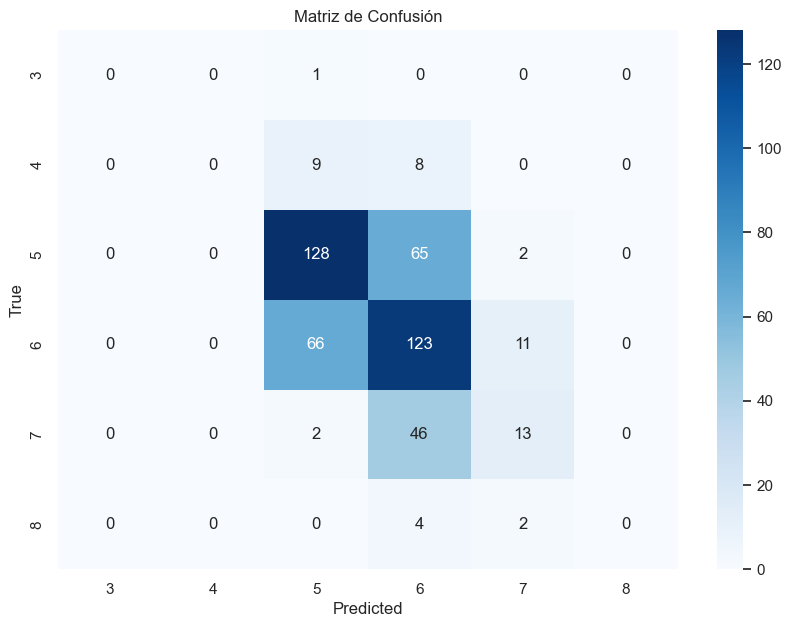

In [41]:
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

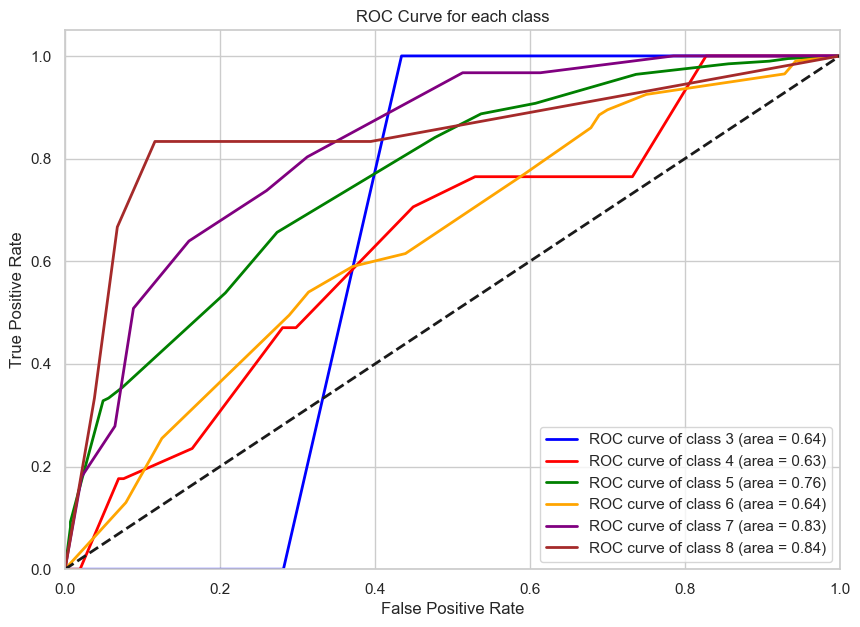

In [43]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = grid_search.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i+3, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

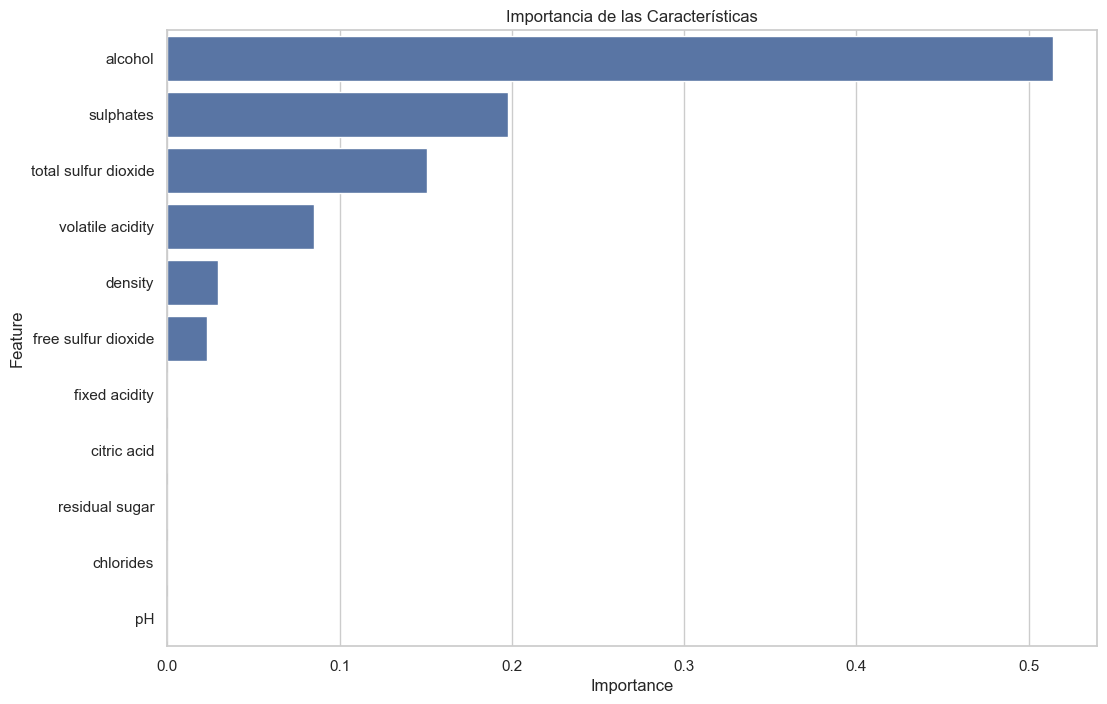

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Importancia de las Características')
plt.show()